## 3.5多元分类

### 1softmax函数
多元分类相比较与逻辑回归（二分类）是更换了激活函数。

### 2多元分类示例

In [1]:
import torch
import matplotlib.pyplot as plt

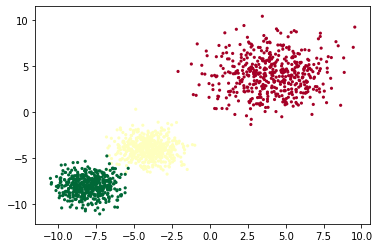

In [2]:
cluster = torch.ones(500, 2)

data0 = torch.normal(4 * cluster, 2)
data1 = torch.normal(-4 * cluster, 1)
data2 = torch.normal(-8 * cluster, 1)
label0 = torch.zeros(500)
label1 = torch.ones(500)
label2 = label1 * 2

x = torch.cat((data0, data1, data2), ).type(torch.FloatTensor)
y = torch.cat((label0, label1, label2), ).type(torch.LongTensor)

plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=y.numpy(), s=10, lw=0, cmap='RdYlGn')
plt.show()

In [3]:
import torch.nn.functional as F
from torch import nn, optim

In [4]:
class Net(nn.Module):
    def __init__(self, input_feature, num_hidden, outputs):
        super(Net, self).__init__()

        self.hidden = nn.Linear(input_feature, num_hidden)

        self.out = nn.Linear(num_hidden, outputs)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.out(x)
        x = F.softmax(x, dim=1)
        return x

In [5]:
net = Net(input_feature=2, num_hidden=20, outputs=3)
inputs = x
target = y

In [6]:
optimizer = optim.SGD(net.parameters(), lr=0.02)
criterion = nn.CrossEntropyLoss()

In [7]:
def draw(output):
    plt.cla()
    output = torch.max((output), 1)[1]
    pred_y = output.data.numpy().squeeze()
    target_y = y.numpy()
    plt.scatter(x.numpy()[:, 0], x.numpy()[:, 1], c=pred_y, s=10, lw=0, cmap='RdYlGn')
    accuracy = sum(pred_y == target_y) / 1500.0
    plt.text(1.5, -4, 'Accuracy=%s' % (accuracy), fontdict={'size': 20, 'color': 'red'})
    plt.pause(0.1)

In [8]:
def train(model, criterion, optimizer, epochs):
    for epoch in range(epochs):

        output = model(inputs)
        loss = criterion(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 40 == 0:
            draw(output)

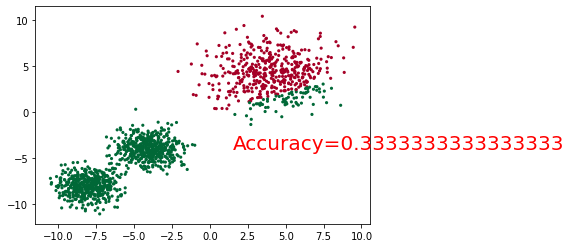

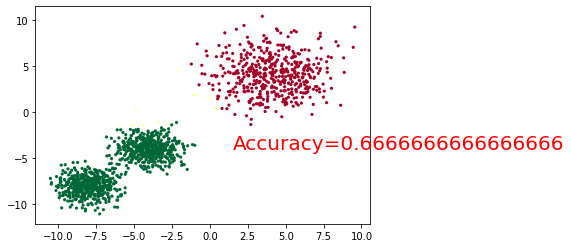

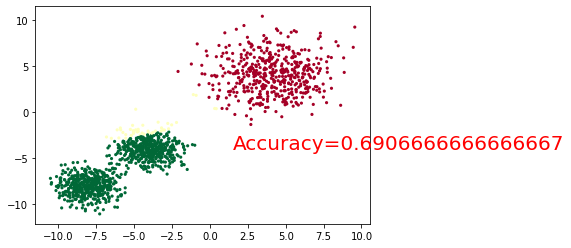

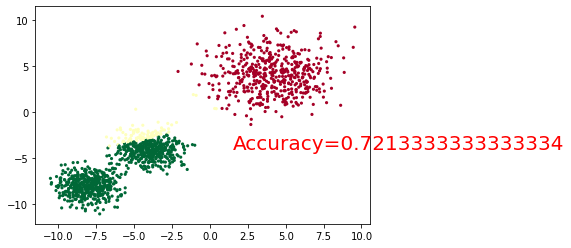

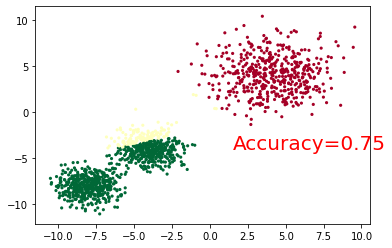

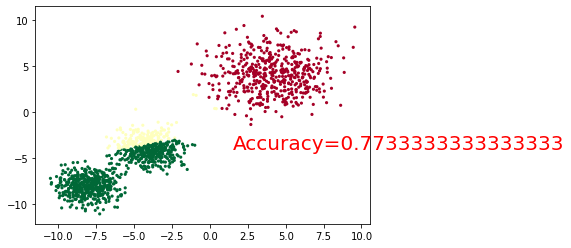

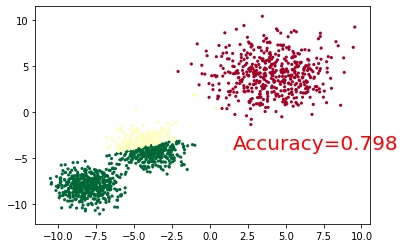

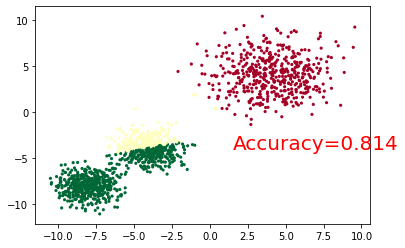

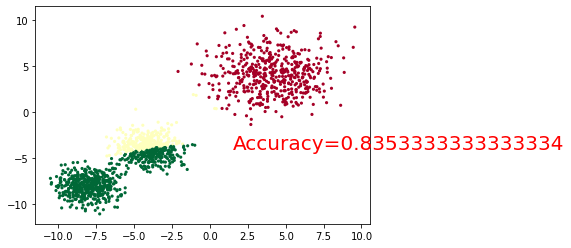

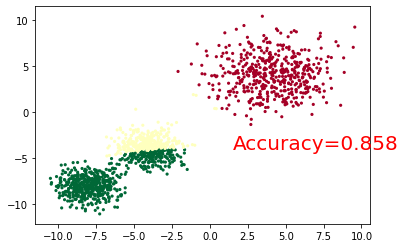

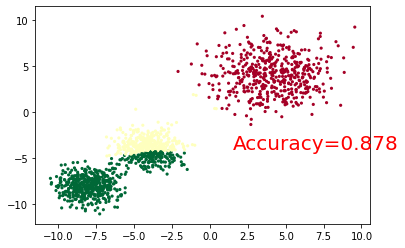

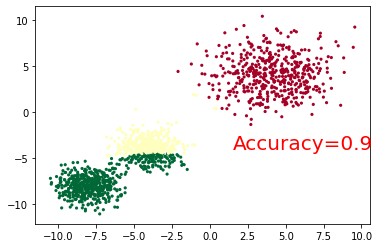

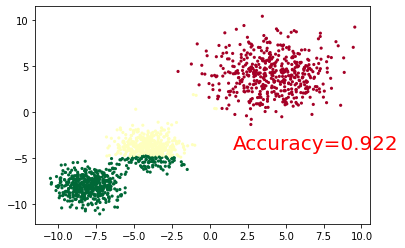

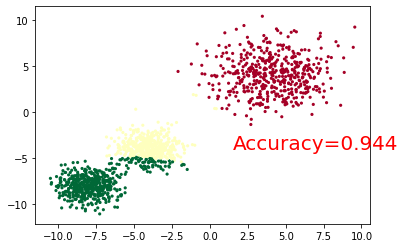

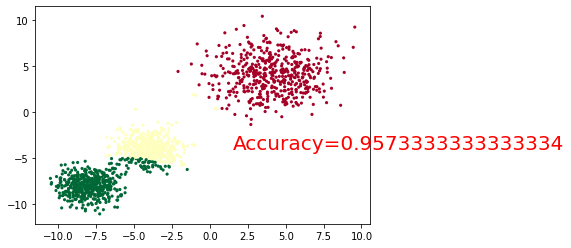

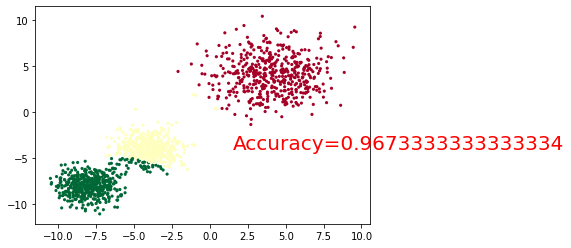

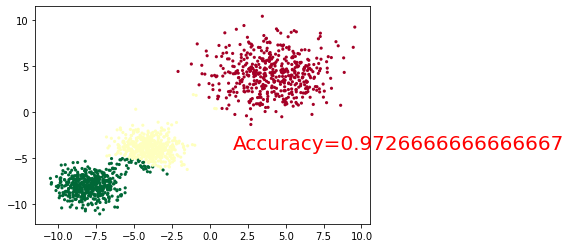

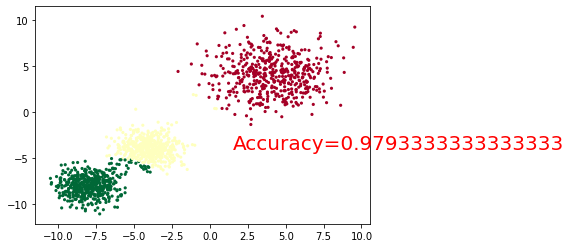

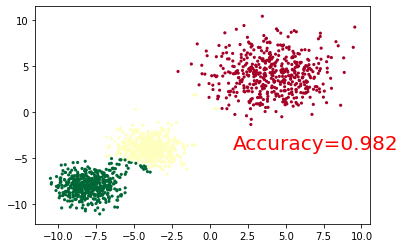

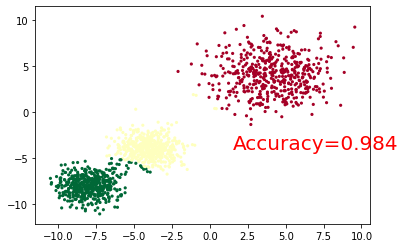

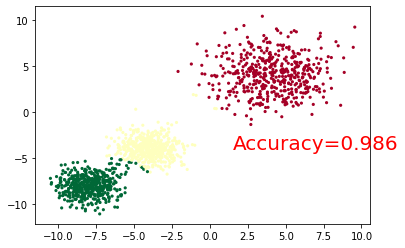

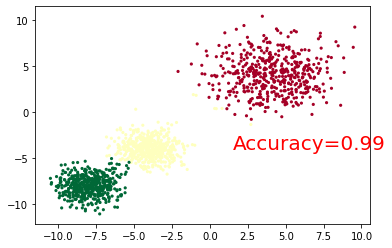

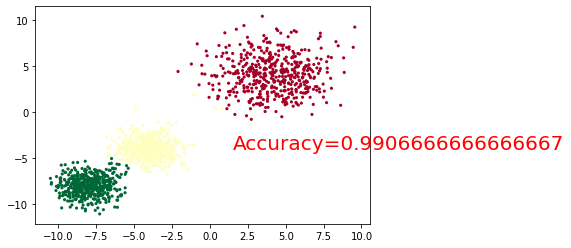

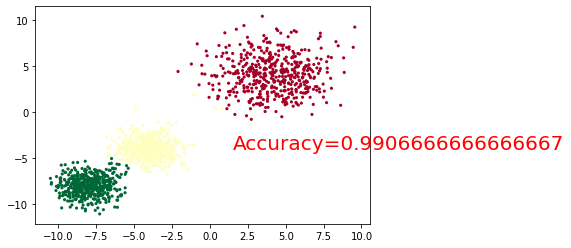

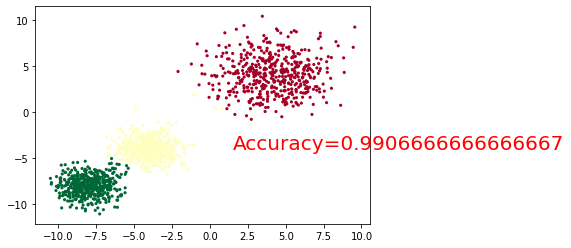

In [9]:
train(net, criterion, optimizer, 1000)